In [1]:
%run ../../multibench.py

In [2]:
from inspect import isfunction
import os, sys
import matplotlib.pyplot as plt
import asciitable
import sys
import os
import shutil
import numpy as np
import glob
from shutil import copyfile
import pathlib
import subprocess


# Summarize numpy array if it has more than 10 elements
np.set_printoptions(threshold=10)

def clean_if_exists(path):
    if os.path.exists(path):
        if(os.path.isfile(path)):
            os.remove(path)
        else:
            shutil.rmtree(path)
            os.mkdir(path)
def get_last_n_lines(string, n):
    return "\n".join(string.split("\n")[-n:])
def create_folder_if_doesnt_exist(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Move two upper directories, import benchmark, revert cwd
sys.path.insert(0, os.path.dirname(os.path.abspath(pathlib.Path().absolute())) + "/..")

In [3]:
input_samples = [os.path.basename(f) for f in glob.glob('input/*_1.fastq.gz')]
input_samples = [f.replace('_1.fastq.gz','') for f in input_samples]
print(input_samples)

['2014C-3599', '2014C-3656', '2014C-3840', '2014C-3655', '2014C-3598', '2014C-3850', '2014C-3857', '2014C-3907', '2014C-3600']


In [4]:
sample_sizes = list(range(1, 20, 3))
sample_sizes

[1, 4, 7, 10, 13, 16, 19]

In [5]:
reference_genome_name = "2011C-3609"

def reset_func():
    for folder in glob.glob("outputs/*"):
        clean_if_exists(folder)
        os.rmdir(folder)
    
def benchmark_list_to_results(benchmark_firsts_list):
    return {
        "memory": max(list(map(lambda result: result.memory.max, benchmark_firsts_list))),
        "disk_read": max(list(map(lambda result: result.disk.read_chars, benchmark_firsts_list))),
        "disk_write": max(list(map(lambda result: result.disk.write_chars, benchmark_firsts_list))),
        "runtime": sum(list(map(lambda result: result.process.execution_time, benchmark_firsts_list)))
    }

num_cores = 16

def sampling_func(sample_size):
    samples = input_samples[:sample_size]
    
    samples_tab_file_lines = []
    

    for sample in samples:
        samples_tab_file_line = "outputs/{0}\tinput/{0}_1.fastq.gz\tinput/{0}_2.fastq.gz".format(sample)
        samples_tab_file_lines.append(samples_tab_file_line)
        
    samples_tab_file_content = "\n".join(samples_tab_file_lines)
        
    
    file = open("samples.tab", "w") 
    file.write(samples_tab_file_content) 
    file.close() 
    
    os.system("snippy-multi samples.tab --ref input/2011C-3609.gbk --cpus " + str(num_cores) + " > snippy-commands.sh")
    
    return samples

snippy_multi_command = {
    "use_parallel": False,
    "command": "bash snippy-commands.sh"
}

# active_output_print: prints stdout and stderr on every iteration
multibench_results, debug_str = multi_cmdbench({
"query": [snippy_multi_command]
}, reset_func = reset_func, iterations = 1, sampling_func = sampling_func, sample_sizes = sample_sizes, 
    benchmark_list_to_results = benchmark_list_to_results, active_output_print = False, progress_bar = True)


In [12]:
 # print(debug_str)

In [7]:
save_path = "multibench_results.txt"

samples_per_sample_size = []
for sample_size in sample_sizes:
        samples_per_sample_size.append(input_samples[:sample_size])

save_multibench_results(multibench_results, samples_per_sample_size, save_path)

In [8]:
read_path = "multibench_results.txt"

multibench_results, samples_per_sample_size = read_multibench_results(read_path)
print(samples_per_sample_size)

[['2014C-3599'], ['2014C-3599,', '2014C-3656,', '2014C-3840,', '2014C-3655'], ['2014C-3599,', '2014C-3656,', '2014C-3840,', '2014C-3655,', '2014C-3598,', '2014C-3850,', '2014C-3857'], ['2014C-3599,', '2014C-3656,', '2014C-3840,', '2014C-3655,', '2014C-3598,', '2014C-3850,', '2014C-3857,', '2014C-3907,', '2014C-3600'], ['2014C-3599,', '2014C-3656,', '2014C-3840,', '2014C-3655,', '2014C-3598,', '2014C-3850,', '2014C-3857,', '2014C-3907,', '2014C-3600'], ['2014C-3599,', '2014C-3656,', '2014C-3840,', '2014C-3655,', '2014C-3598,', '2014C-3850,', '2014C-3857,', '2014C-3907,', '2014C-3600'], ['2014C-3599,', '2014C-3656,', '2014C-3840,', '2014C-3655,', '2014C-3598,', '2014C-3850,', '2014C-3857,', '2014C-3907,', '2014C-3600']]


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

[{'runtime': 12.95, 'memory': 542773248.0, 'disk_read': 419893083.0, 'disk_write': 176499434.0}, {'runtime': 49.16, 'memory': 542781440.0, 'disk_read': 1735930874.0, 'disk_write': 737743168.0}, {'runtime': 85.58, 'memory': 543322112.0, 'disk_read': 2929701782.0, 'disk_write': 1233248700.0}, {'runtime': 112.06, 'memory': 543580160.0, 'disk_read': 3885030206.0, 'disk_write': 1648530158.0}, {'runtime': 110.29, 'memory': 543301632.0, 'disk_read': 3885030178.0, 'disk_write': 1648349768.0}, {'runtime': 111.06, 'memory': 543318016.0, 'disk_read': 3885030114.0, 'disk_write': 1648972543.0}, {'runtime': 109.75, 'memory': 543354880.0, 'disk_read': 3885030194.0, 'disk_write': 1648825071.0}]


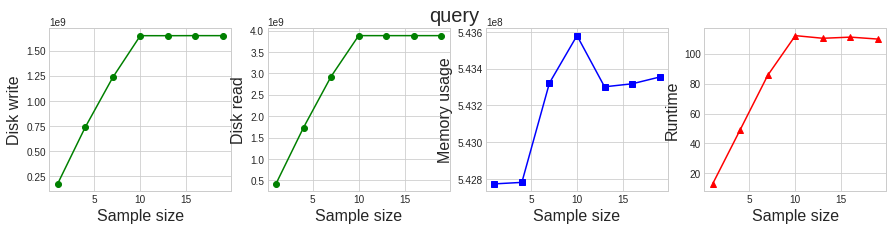

In [10]:
# Typer command Plots
plot_resources(multibench_results, sample_sizes, "query")